In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import pickle as pk
from sklearn.decomposition import PCA

In [2]:
sub, layer, seq_len, roi_only = 'I', 8, 10, True

In [5]:
encoding_model_X, use_ridge_X, batch_size_X = 'linear', True, None
roi_folder_X = 'roi_voxels' if roi_only else 'all_voxels'
ridge_str_X = '' if use_ridge_X else '_noridge'
batch_str_X = 'nobatch' if (batch_size_X is None) else 'batch{}'.format(batch_size_X)
experiment_name_X = 'subject{}_bert_layer{}_len{}_{}{}_{}'.format(sub, layer, seq_len, encoding_model_X, ridge_str_X, batch_str_X)
output_path_X = '../fmri_preds/{}/{}/final_predictions.npy'.format(roi_folder_X, experiment_name_X)
corrs_X = np.load(output_path_X, allow_pickle=True).item()['corrs']

encoding_model_Y, use_ridge_Y, batch_size_Y = 'nonlinear_sharedhidden', True, 32
roi_folder_Y = 'roi_voxels' if roi_only else 'all_voxels'
ridge_str_Y = '' if use_ridge_Y else '_noridge'
batch_str_Y = 'nobatch' if (batch_size_Y is None) else 'batch{}'.format(batch_size_Y)
experiment_name_Y = 'subject{}_bert_layer{}_len{}_{}{}_{}'.format(sub, layer, seq_len, encoding_model_Y, ridge_str_Y, batch_str_Y)
output_path_Y = '../fmri_preds/{}/{}/final_predictions.npy'.format(roi_folder_Y, experiment_name_Y)
corrs_Y = np.load(output_path_Y, allow_pickle=True).item()['corrs']

In [8]:
def plot_correlations(X, Y, sub, x_label, y_label):
    plt.scatter(X, Y)
    
    pca = PCA(n_components=1, svd_solver='full')
    pca_first = pca.fit(np.transpose(np.vstack([X,Y])))
    x_mean, y_mean = np.mean(X), np.mean(Y)
    plt.plot((-1,1),(-1,1),'r')
    print("PCA comps: {}".format(pca_first.components_[0]))
    plt.plot((x_mean-pca_first.components_[0][0],x_mean,x_mean+pca_first.components_[0][0]),(y_mean-pca_first.components_[0][1], y_mean, y_mean+pca_first.components_[0][1]), 'k')
    
    plt.title('Corrs PCA: Sub={}, Layer={}, Context={} \n {} v {}'.format(sub, layer, seq_len, x_label, y_label))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(-0.25, 0.5)
    plt.ylim(-0.25, 0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

PCA comps: [0.310383   0.26213511 0.41041854 0.40022792 0.31371075 0.26441135
 0.41872341 0.40331715]


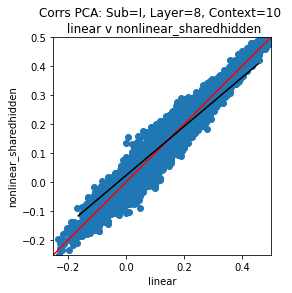

In [9]:
plot_correlations(corrs_X, corrs_Y, sub, encoding_model_X, encoding_model_Y)